##### Файл - BoardingData

In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
sns.set_palette(palette="husl")

### Представление массива данных

In [6]:
file_path = "BoardingData_2.csv"
date_parser = lambda x: pd.to_datetime(x, format="%d.%m.%Y")
parse_dates={'datetime': ['date', 'time']}
df = pd.read_csv(file_path, sep=";", na_values="None", converters={"TicketNumber": lambda x: str(x),
                                                                   "PassengerDocument": lambda x: str(x),
                                                                  "PassengerBirthDate": date_parser,
                                                                  "FlightDate": date_parser})
df

,PassengerSecondName,PassengerFirstLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination
0,VIKTOROVICH,SAVELII RUSANOV,Male,1983-10-03,2 879 096 860,FRNINO,6630000000000000,Transit,2017-03-22,6:05,SU1369,Own,Moscow
1,MARKOVICH,LEV ISAEV,Male,1975-12-13,1 788 173 211,NaN,1640000000000000,Registered,2017-03-18,22:10,SU1180,Own,Volgograd
2,I,NIKOLAI NIKOLSKII,Male,1990-12-26,4 396 926 588,VWNYGF,6250000000000000,Transit,2017-03-18,22:10,SU1180,Own,Volgograd
3,PETROVICH,ANATOLII SHILOV,Male,1997-05-24,2 595 919 752,WQFFUE,None,Registered,2017-03-18,22:10,SU1180,Own,Volgograd
4,VIACHESLAVOVNA,MIROSLAVA SEMENOVA,Female,1976-01-31,6 775 516 990,NaN,None,Registered,2017-03-12,11:45,SU6284,Own,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155142,S,RAMIL DOROFEEV,Male,1994-02-14,3 256 077 151,SNRBXU,8650000000000000,Delayed,2017-05-18,6:30,SU1158,Own,Rostov
155143,KONSTANTINOVICH,RUSLAN CHISTIAKOV,Male,1975-02-14,3 497 458 395,NaN,224000000000000,NaN,2017-05-18,6:30,SU1158,Own,Rostov
155144,VALEREVNA,SOFIA KALMYKOVA,Female,1972-12-17,6 618 352 713,NaN,None,Registered,2017-10-02,7:30,SU5614,Own,Petropavlovsk
155145,F,VIACHESLAV KONONOV,Male,2000-05-20,4 567 242 088,NaN,976000000000000,Registered,2017-09-16,7:00,SU1640,Own,Omsk


### Кол-во уникальных данных

In [7]:
df.nunique()

PassengerSecondName         214
PassengerFirstLastName    52114
PassengerSex                  2
PassengerBirthDate        11301
PassengerDocument         73263
BookingCode               77373
TicketNumber               2354
Baggage                       3
FlightDate                  366
FlightTime                  206
FlightNumber                385
CodeShare                     2
Destination                  48
dtype: int64

In [8]:
df.describe()

,PassengerSecondName,PassengerFirstLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination
count,155147,155147,155147,155147,155147,77386,155147,116215,155147,155147,155147,155147,155147
unique,214,52114,2,11301,73263,77373,2354,3,366,206,385,2,48
top,A,ALINA BORODINA,Female,1976-02-01 00:00:00,1 548 113 497,VPRMIK,None,Registered,2017-01-01 00:00:00,6:05,SU4606,Own,Moscow
freq,11119,22,77863,45,16,2,77800,38957,5262,3221,2909,146373,88022
first,NaN,NaN,NaN,1970-01-02 00:00:00,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2000-12-30 00:00:00,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN


#### Форматирование данных

In [9]:
# convert data columns
df["Destination"] = df["Destination"].astype(str)
df["Destination"] = df.apply(lambda city: city["Destination"].upper(), axis=1)
df.head()

,PassengerSecondName,PassengerFirstLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination
0,VIKTOROVICH,SAVELII RUSANOV,Male,1983-10-03,2 879 096 860,FRNINO,6630000000000000,Transit,2017-03-22,6:05,SU1369,Own,MOSCOW
1,MARKOVICH,LEV ISAEV,Male,1975-12-13,1 788 173 211,NaN,1640000000000000,Registered,2017-03-18,22:10,SU1180,Own,VOLGOGRAD
2,I,NIKOLAI NIKOLSKII,Male,1990-12-26,4 396 926 588,VWNYGF,6250000000000000,Transit,2017-03-18,22:10,SU1180,Own,VOLGOGRAD
3,PETROVICH,ANATOLII SHILOV,Male,1997-05-24,2 595 919 752,WQFFUE,None,Registered,2017-03-18,22:10,SU1180,Own,VOLGOGRAD
4,VIACHESLAVOVNA,MIROSLAVA SEMENOVA,Female,1976-01-31,6 775 516 990,NaN,None,Registered,2017-03-12,11:45,SU6284,Own,MOSCOW


### График с представлением кол-ва перелетов в города

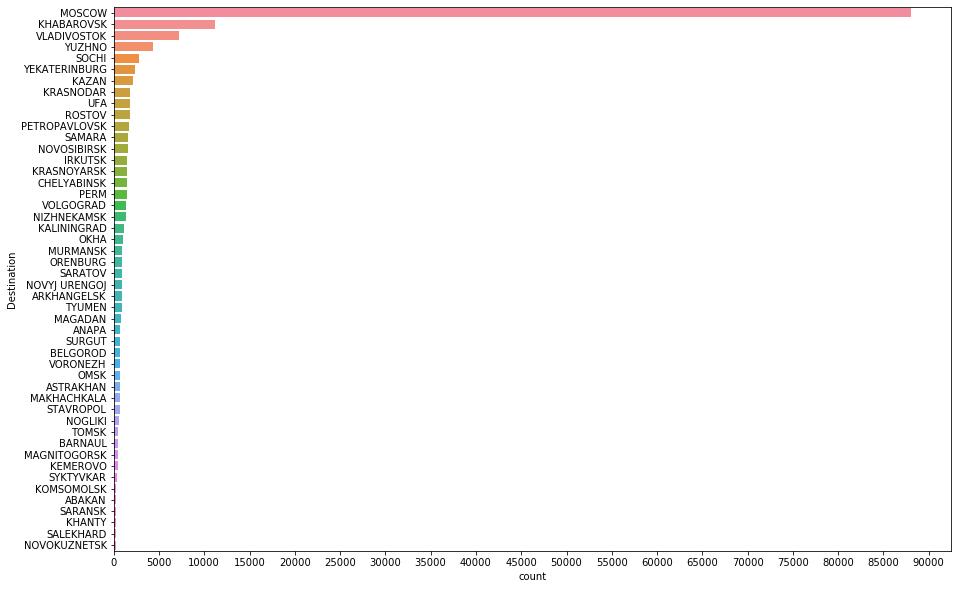

In [10]:
plt.figure(figsize=(15, 10))

city_count = df["Destination"].value_counts()
cnt = sns.countplot(y="Destination", data=df, 
                    order = df['Destination'].value_counts().index, saturation=0.9) 
cnt.xaxis.set_major_locator(ticker.MultipleLocator(5000))

### Возраст пассажиров

In [11]:
df["Age"] = ((df["FlightDate"] - df["PassengerBirthDate"]) / np.timedelta64(1, "Y")).astype(int)
df.head()

,PassengerSecondName,PassengerFirstLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination,Age
0,VIKTOROVICH,SAVELII RUSANOV,Male,1983-10-03,2 879 096 860,FRNINO,6630000000000000,Transit,2017-03-22,6:05,SU1369,Own,MOSCOW,33
1,MARKOVICH,LEV ISAEV,Male,1975-12-13,1 788 173 211,NaN,1640000000000000,Registered,2017-03-18,22:10,SU1180,Own,VOLGOGRAD,41
2,I,NIKOLAI NIKOLSKII,Male,1990-12-26,4 396 926 588,VWNYGF,6250000000000000,Transit,2017-03-18,22:10,SU1180,Own,VOLGOGRAD,26
3,PETROVICH,ANATOLII SHILOV,Male,1997-05-24,2 595 919 752,WQFFUE,None,Registered,2017-03-18,22:10,SU1180,Own,VOLGOGRAD,19
4,VIACHESLAVOVNA,MIROSLAVA SEMENOVA,Female,1976-01-31,6 775 516 990,NaN,None,Registered,2017-03-12,11:45,SU6284,Own,MOSCOW,41


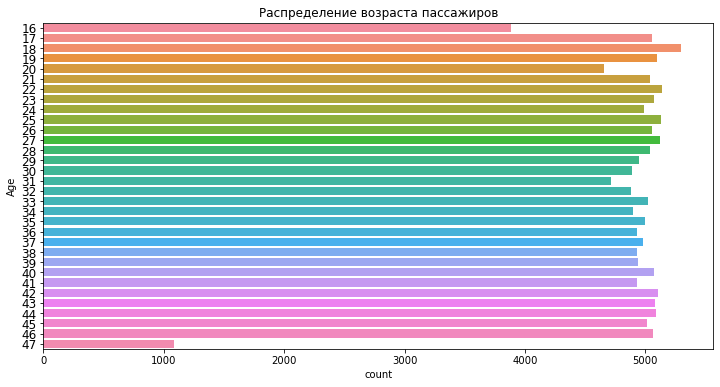

In [12]:
plt.figure(figsize=(12, 6))
plt.yticks(fontsize=12)
plt.title("Распределение возраста пассажиров")
sns.countplot(y="Age", data=df, saturation=0.9)

### Как часто летают пассажиры

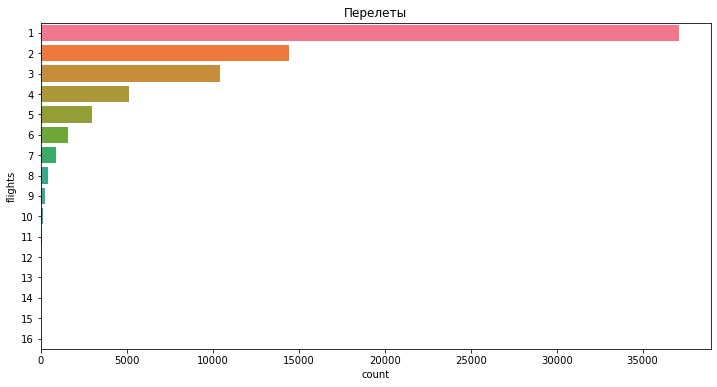

In [13]:
plt.figure(figsize=(12, 6))
plt.title("Перелеты")
# Группировка пассажиров по именам и пассажирскому документу
flight_freq = (df["PassengerDocument"].astype(str) + ";" + df["PassengerFirstLastName"]).value_counts().to_frame("flights")
sns.countplot(y="flights", data=flight_freq, palette="husl", saturation=0.9)

In [14]:
# Разделение док-та от имени пассажира
flight_freq_two = flight_freq.reset_index()
flight_freq_two = flight_freq_two.rename(columns={"index": "combin"})
flight_freq_two[["PassengerDocument", "PassengerFirstLastName"]] = flight_freq_two["combin"].str.split(";", expand=True)
flight_freq_two = flight_freq_two.drop(columns = ["combin"])
flight_freq_two = flight_freq_two.drop_duplicates()
flight_freq_two.head()

,flights,PassengerDocument,PassengerFirstLastName
0,16,1 548 113 497,MAIIA BARANOVA
1,15,7 126 372 174,TIKHON GONCHAROV
2,14,8 816 864 475,AMIR MASLOV
3,14,5 293 500 602,KARINA NAUMOVA
4,14,6 937 933 652,MIKHAIL CHEBOTAREV


### Добавление кол-ва перелетов по каждому пассажиру

In [15]:
# Слияние 2 таблиц по 2 столбцам
df_flights = pd.merge(df, flight_freq_two, on=["PassengerDocument", "PassengerFirstLastName"], how="right")
df_flights.head()

,PassengerSecondName,PassengerFirstLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination,Age,flights
0,VIKTOROVICH,SAVELII RUSANOV,Male,1983-10-03,2 879 096 860,FRNINO,6630000000000000,Transit,2017-03-22,6:05,SU1369,Own,MOSCOW,33,2
1,V,SAVELII RUSANOV,Male,1983-10-03,2 879 096 860,NaN,None,NaN,2017-02-17,16:30,SU1364,Own,STAVROPOL,33,2
2,MARKOVICH,LEV ISAEV,Male,1975-12-13,1 788 173 211,NaN,1640000000000000,Registered,2017-03-18,22:10,SU1180,Own,VOLGOGRAD,41,3
3,M,LEV ISAEV,Male,1975-12-13,1 788 173 211,NaN,None,Delayed,2017-03-02,14:00,SU1703,Own,MOSCOW,41,3
4,MARKOVICH,LEV ISAEV,Male,1975-12-13,1 788 173 211,LTQKDH,7640000000000000,Delayed,2017-01-19,8:00,SU5603,Own,VLADIVOSTOK,41,3


In [16]:
df_flights = df_flights.sort_values(by="flights", ascending=False)

In [17]:
# Датафрейм с данными о пассажирах, которые летали чаще 7 раз
df_flights = df_flights[df_flights["flights"] >= 7]


### Группировка пассажиров

In [18]:
# Удаление лишних колонок
df_flights_small = df_flights.drop(columns=["PassengerSex", "PassengerBirthDate",
                                           "Baggage", "FlightTime", "CodeShare", "Age"])
# Группировка пассажиров по датам перелета и рейсам
grouped_flights = df_flights_small.groupby(["flights", "PassengerDocument"], as_index=False)
# Список  созданных групп
flights_groups = list(grouped_flights.groups.keys())

grouped_flighters = {}

for group in flights_groups:
    # Для каждой группы пассажиров
    tmp_df = grouped_flights.get_group(group)
#      Если пассажиров > 1
    if tmp_df.shape[0] > 1:
#         Получаем кол-во перелетов этой группы
        flights_count = group[0]
#         Обновляем данные по групповым перелетам
        if flights_count in grouped_flighters.keys():
            grouped_flighters.update({flights_count: grouped_flighters[flights_count].append(tmp_df)})
        else:
            grouped_flighters.update({flights_count: tmp_df})


In [19]:
for key in grouped_flighters.keys():
    # размер группы
    group_size = grouped_flighters[key]["PassengerDocument"].drop_duplicates().shape[0]
    print(f'В группе с {key} перелетами находилось {group_size} уникальных пассажиров')


В группе с 7 перелетами находилось 882 уникальных пассажиров
В группе с 8 перелетами находилось 395 уникальных пассажиров
В группе с 9 перелетами находилось 218 уникальных пассажиров
В группе с 10 перелетами находилось 103 уникальных пассажиров
В группе с 11 перелетами находилось 45 уникальных пассажиров
В группе с 12 перелетами находилось 18 уникальных пассажиров
В группе с 13 перелетами находилось 11 уникальных пассажиров
В группе с 14 перелетами находилось 3 уникальных пассажиров
В группе с 15 перелетами находилось 1 уникальных пассажиров
В группе с 16 перелетами находилось 1 уникальных пассажиров


In [20]:
# Пассажиры сгруппированы по кол-ву полетов
# Обращение проискодит по ключу, где ключ = [7,..., 16] 
grouped_flighters[7].head()

,PassengerSecondName,PassengerFirstLastName,PassengerDocument,BookingCode,TicketNumber,FlightDate,FlightNumber,Destination,flights
43563,KIRILLOVNA,KSENIIA GUSEVA,1 000 157 913,NaN,None,2017-06-09,SU5628,YUZHNO,7
43562,K,KSENIIA GUSEVA,1 000 157 913,UXZDLE,None,2017-08-29,SU5624,YUZHNO,7
43565,K,KSENIIA GUSEVA,1 000 157 913,WIJKLT,None,2017-02-13,SU5653,KHABAROVSK,7
43564,KIRILLOVNA,KSENIIA GUSEVA,1 000 157 913,NYUEYU,None,2017-12-08,SU5627,KHABAROVSK,7
43567,K,KSENIIA GUSEVA,1 000 157 913,NaN,5900000000000000,2017-04-06,SU5684,PETROPAVLOVSK,7


### Пассажир, совершивший наибольшее кол-во перелетов

In [21]:
grouped_flighters[16]

,PassengerSecondName,PassengerFirstLastName,PassengerDocument,BookingCode,TicketNumber,FlightDate,FlightNumber,Destination,flights
42442,ANATOLEVNA,MAIIA BARANOVA,1 548 113 497,FOWFJE,120000000000000,2017-01-12,SU5613,KHABAROVSK,16
42439,A,MAIIA BARANOVA,1 548 113 497,RIWCDE,2900000000000000,2017-03-04,SU5640,KRASNOYARSK,16
42449,ANATOLEVNA,MAIIA BARANOVA,1 548 113 497,LTOZUQ,368000000000000,2017-03-05,SU1487,MOSCOW,16
42453,A,MAIIA BARANOVA,1 548 113 497,JLDUGM,4330000000000000,2017-07-17,SU5602,KHABAROVSK,16
42450,A,MAIIA BARANOVA,1 548 113 497,LHSKXY,2930000000000000,2017-05-02,SU4606,OKHA,16
42451,A,MAIIA BARANOVA,1 548 113 497,NaN,6120000000000000,2017-02-19,SU4606,KHABAROVSK,16
42452,ANATOLEVNA,MAIIA BARANOVA,1 548 113 497,NaN,4380000000000000,2017-06-19,SU5620,YUZHNO,16
42441,ANATOLEVNA,MAIIA BARANOVA,1 548 113 497,NaN,3600000000000000,2017-05-04,SU4606,KHABAROVSK,16
42438,A,MAIIA BARANOVA,1 548 113 497,XTCWQK,None,2017-04-04,SU6289,MAGADAN,16
42440,ANATOLEVNA,MAIIA BARANOVA,1 548 113 497,KWMJTP,None,2017-01-16,SU4605,OKHA,16


In [22]:
# Куда чаще летала
grouped_flighters[16]["Destination"].value_counts()

KHABAROVSK     6
OKHA           3
VLADIVOSTOK    2
MOSCOW         2
YUZHNO         1
MAGADAN        1
KRASNOYARSK    1
Name: Destination, dtype: int64

In [23]:
import re
col_names = list(df_flights.columns)
col_names_upper = []
for col_name in col_names:
    col_names_upper.append("_".join([val.upper() for val in re.findall('[A-Z][^A-Z]*',col_name)]))


In [24]:
col_names_upper[-1] = "FLIGHTS"
df_flights.columns = col_names_upper
df_flights.columns

Index(['PASSENGER_SECOND_NAME', 'PASSENGER_FIRST_LAST_NAME', 'PASSENGER_SEX',
       'PASSENGER_BIRTH_DATE', 'PASSENGER_DOCUMENT', 'BOOKING_CODE',
       'TICKET_NUMBER', 'BAGGAGE', 'FLIGHT_DATE', 'FLIGHT_TIME',
       'FLIGHT_NUMBER', 'CODE_SHARE', 'DESTINATION', 'AGE', 'FLIGHTS'],
      dtype='object')

In [25]:
df_flights.head()
# col_names_upper

,PASSENGER_SECOND_NAME,PASSENGER_FIRST_LAST_NAME,PASSENGER_SEX,PASSENGER_BIRTH_DATE,PASSENGER_DOCUMENT,BOOKING_CODE,TICKET_NUMBER,BAGGAGE,FLIGHT_DATE,FLIGHT_TIME,FLIGHT_NUMBER,CODE_SHARE,DESTINATION,AGE,FLIGHTS
42442,ANATOLEVNA,MAIIA BARANOVA,Female,1970-05-22,1 548 113 497,FOWFJE,120000000000000,Delayed,2017-01-12,15:50,SU5613,Own,KHABAROVSK,46,16
42439,A,MAIIA BARANOVA,Female,1970-05-22,1 548 113 497,RIWCDE,2900000000000000,Delayed,2017-03-04,20:30,SU5640,Own,KRASNOYARSK,46,16
42449,ANATOLEVNA,MAIIA BARANOVA,Female,1970-05-22,1 548 113 497,LTOZUQ,368000000000000,Registered,2017-03-05,21:35,SU1487,Own,MOSCOW,46,16
42453,A,MAIIA BARANOVA,Female,1970-05-22,1 548 113 497,JLDUGM,4330000000000000,Transit,2017-07-17,16:35,SU5602,Own,KHABAROVSK,47,16
42450,A,MAIIA BARANOVA,Female,1970-05-22,1 548 113 497,LHSKXY,2930000000000000,NaN,2017-05-02,13:50,SU4606,Operated,OKHA,46,16


In [26]:
# write_path = "normal_data\\BoardingData_2_normal.csv"
# df_flights.to_csv(write_path, sep=";", na_rep="NULL")